# Calibration of groundwater models

Based on researches from Jana Glass, see word document.  
Uses the given Head-Observation-File `./calibration.hob_out`

In [1]:
import numpy as np

### Read the head-observation output file

Let's create temporarily lists for simulated and observed values

In [2]:
f = open('./calibration.hob_out', 'r')

header = False

names = [] 
observed = [] 
simulated = []

for line in f:
    if line.startswith('#'):
        continue
    
    if header == False:
        header = line.split('"')[1::2]
        continue
        
    values = line.split()
    simulated.append(float(values[0]))
    observed.append(float(values[1]))
    names.append('_'.join(values[2].split('_')[:-1]))
    
    
simulated = np.array(simulated)
observed = np.array(observed)

## Calculate statistics

### Number of data points n


In [3]:
n = len(simulated)
print (n)

288


### Maximum residual (rMax)

In [4]:
rMax = np.max(np.abs(simulated-observed))
print(rMax)

3.4412841796


### Minimum residual (rMin)

In [5]:
rMin = np.min(np.abs(simulated-observed))
print(rMin)

0.006655216219999982


### Residual mean (rMean)

In [6]:
rMean = np.mean(simulated-observed)
print(rMean)

-0.37619232149534787


### Absolute residual mean (arMean)

In [7]:
arMean = np.mean(abs(simulated-observed))
print(arMean)

1.0508644575506798


### Standard error of the estimate SSE

In [8]:
from scipy import stats

sse = stats.sem(simulated-observed)
print(sse)

0.07416341705564417


### Root Mean Sqared Error RMSE

In [9]:
rmse = np.sqrt(((simulated-observed) ** 2).mean())
print(rmse)

1.3115188256296897


### Normalized Root Mean Sqared Error RMSE

In [10]:
nrmse = rmse / (np.max(observed) - np.min(observed))
print(nrmse)

0.048164481260051156


### Correlation Coefficient R (Pearson)

In [11]:
R = stats.pearsonr(observed, simulated)[0]
print(R)

0.9925449039129356


### Coefficient of Determination R2

In [12]:
from sklearn.metrics import r2_score

print(r2_score(observed, simulated))

0.9694114022467805


## Plot simulated vs. observed values

__Done__

* Plot simulated on y-axis, observed heads on x-axis
* Automatic scale for x- and y-axis
* Plot every well with different color
* Include Line of equality (1:1)


__Todo__

* Include in plot: off/on for different wells

(0.23021912922051466, 0.5221655137701811)


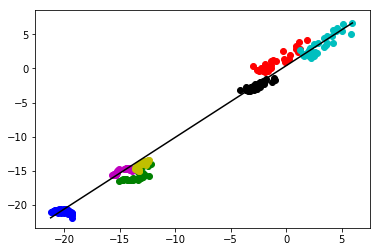

In [13]:
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k'])

current_name = names[0]
last_index = 0

for index, name in enumerate(names):
    if current_name == name:
        continue
    
    plt.scatter(
        observed[last_index:index], 
        simulated[last_index:index],
        color=next(colors)
    )
    
    last_index = index
    current_name = name
    
plt.plot(
    [np.min(observed), np.max(observed)], 
    [np.min(simulated), np.max(simulated)],
    'k-'
)

ci = stats.t.interval(
    0.95, 
    len((observed - simulated))-1, 
    loc=np.mean((observed - simulated)), 
    scale=stats.sem((observed - simulated))
)


print(ci)

plt.show()